In [139]:
#Dat <- read.csv("CoronavirusSurveyData20200417.csv",header = TRUE, stringsAsFactors = FALSE)
#head(Dat)

In [133]:
library(data.table)

In [591]:
sData <- fread("CoronavirusSurveyData20200417.csv")
sData.df <- data.frame(sData)
round(mean(sData.df$Age[!is.na(sData$Age)]))
median(sData.df$Age[!is.na(sData$Age)])
#min(sData$Age[!is.na(sData$Age)])
#max(sData$Age[!is.na(sData$Age)])
#head(sData.df)

[1] 36

[1] 35

In [46]:
library(dplyr)
library(ggplot2)

In [592]:
# Interviewees grouped by gender
agg_gender <- table(sData.df$Gender) 
agg_gender


Female   Male 
   181    369 

In [593]:
pct <- c(round((agg_gender[1]/sum(agg_gender))*100), round((agg_gender[2]/sum(agg_gender))*100))

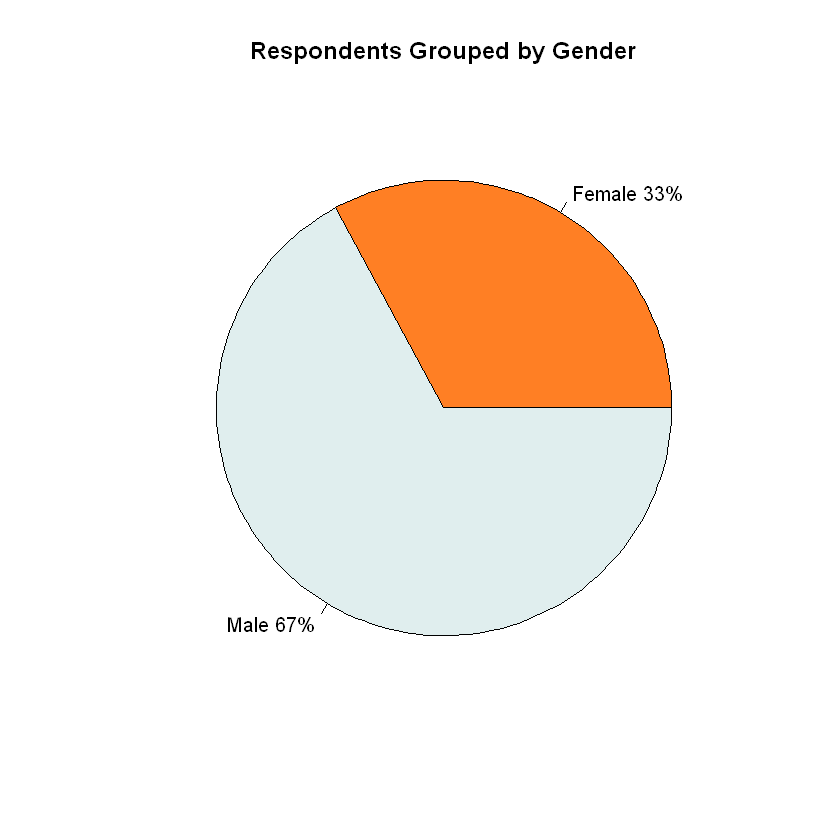

In [594]:
lbls <- c("Female", "Male")
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # add % to labels
pie(agg_gender,labels = lbls, col=c("chocolate1", "azure2"), main="Respondents Grouped by Gender")

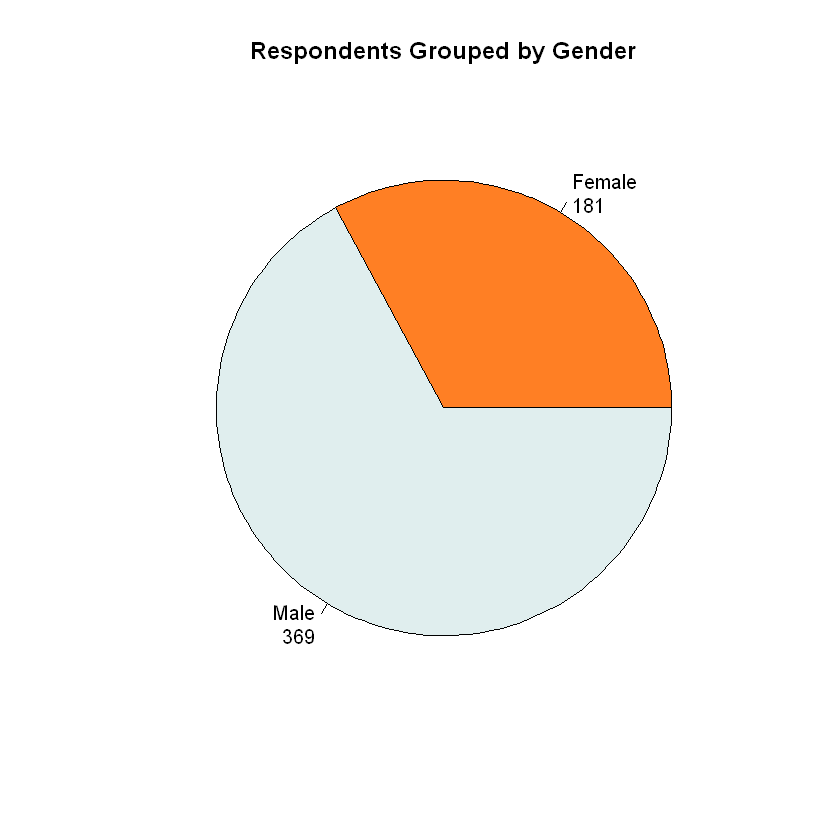

In [239]:
lbls <- paste(names(agg_gender), "\n", agg_gender, sep="")
pie(agg_gender, labels = lbls, col=c("chocolate1", "azure2"), main="Respondents Grouped by Gender")

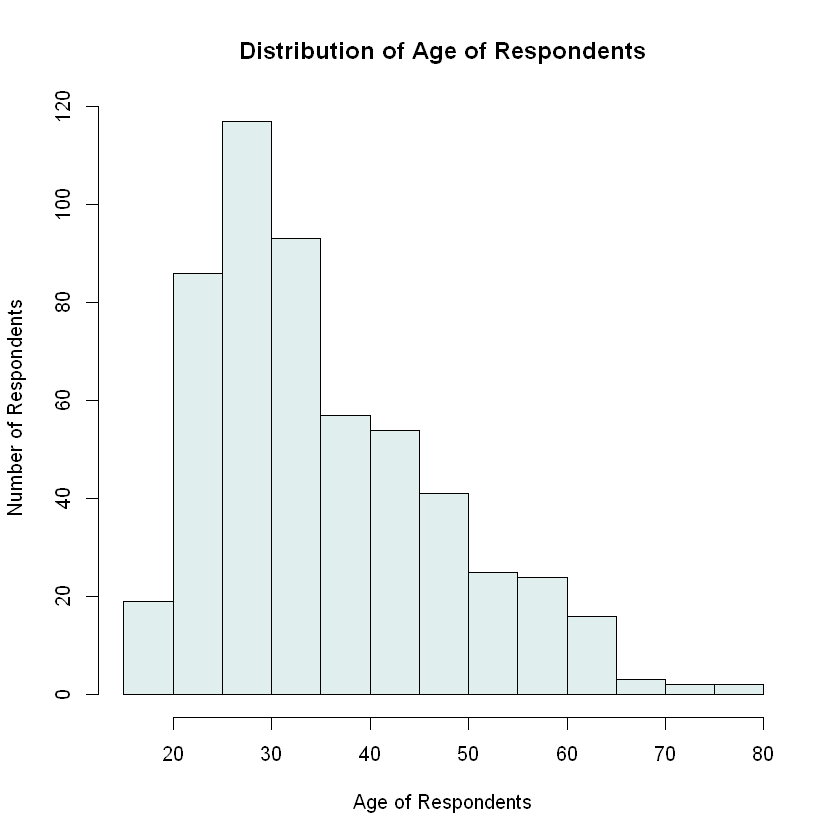

In [628]:
sData.df_adults <- sData.df[sData.df$Age >= 18,]
hist(sData.df_adults$Age, col="azure2", main = 'Distribution of Age of Respondents', xlab="Age of Respondents", ylab="Number of Respondents")

In [629]:
sum(sData$Age[!is.na(sData$Age)] < 18) # There are 9 children among those interviewed

[1] 9

In [630]:
# Summary statistics of Age
summary(sData.df_adults$Age[!is.na(sData.df_adults$Age)])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   27.00   35.00   36.73   45.00   80.00 

In [631]:
age_grps <- cut(sData.df_adults$Age, breaks=seq(18,88,10), right = FALSE)
myTable_age <- table(age_grps)

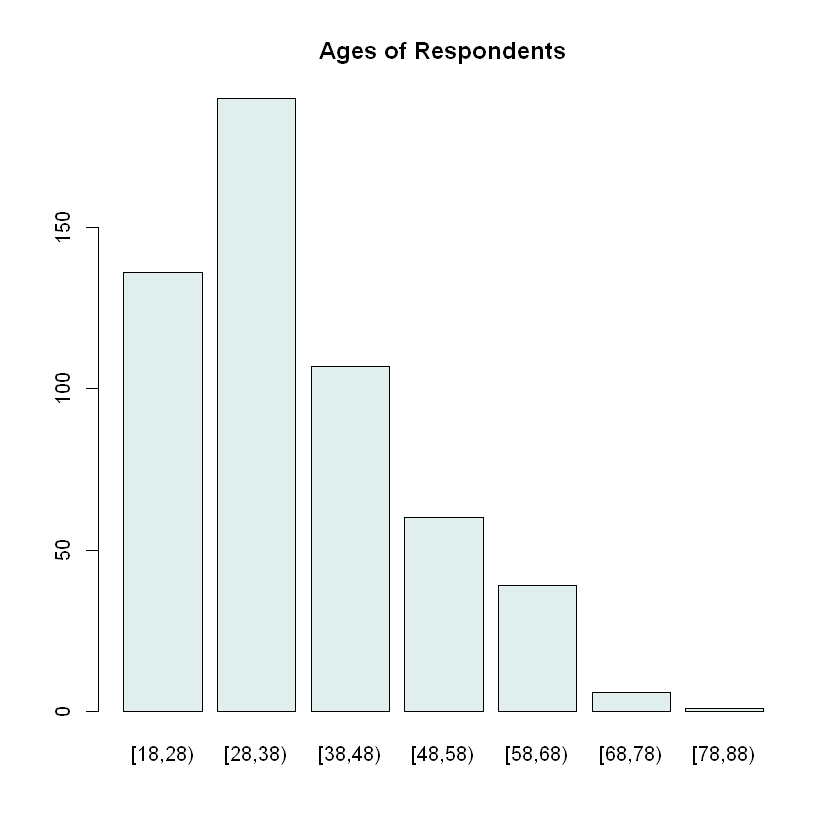

In [632]:
barplot(myTable_age, col="azure2", main = "Ages of Respondents")

In [221]:
# Summary statistics of Household size
summary(sData.df$Household.size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   5.391   7.000  11.000 

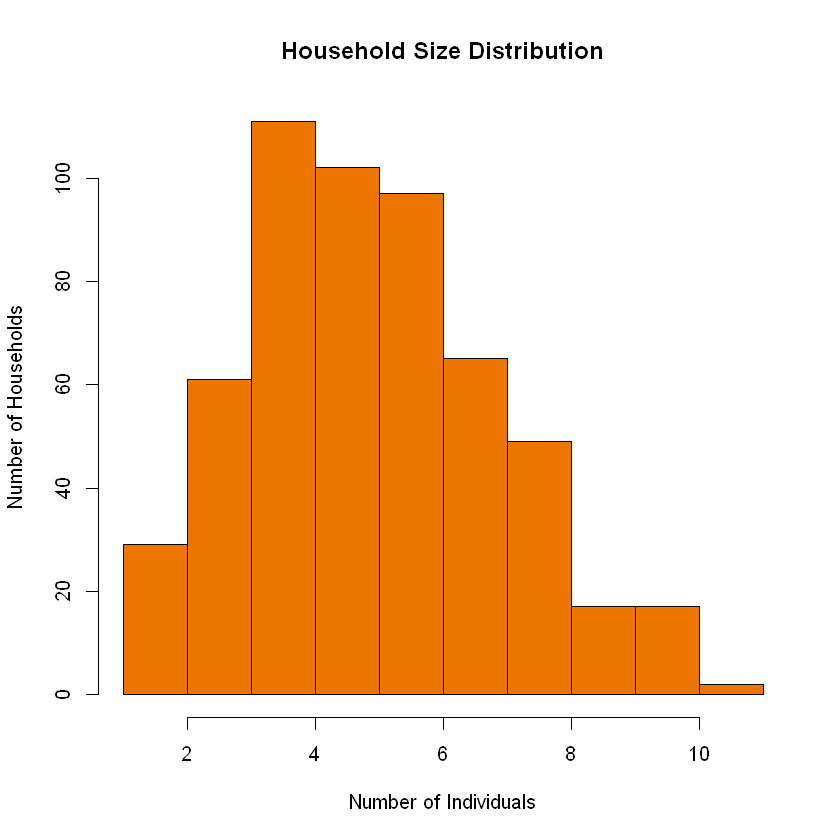

In [469]:
hist(sData.df$Household.size, col="darkorange2", main = 'Household Size Distribution', xlab="Number of Individuals", 
     ylab="Number of Households")

### Coronavirus Questions

In [586]:
Covid19_Qs <- sData.df[,c(5,336:450)]
# colnames(Covid19_Qs)
# Covid19_Qs[,1]

In [245]:
# Do you Know what coronavirus is?
Respondents_yes_no <- table(Covid19_Qs[,2])
pct_response <- round((Respondents_yes_no/sum(Respondents_yes_no))*100)

In [246]:
lbls_response = c("No", "Yes")
lbls_response <- paste(lbls_response, pct_response) # add percents to labels
lbls_response <- paste(lbls_response,"%",sep="") # add % to labels

In [247]:
lbls_response

[1] "No 37%"  "Yes 63%"

In [547]:
covid_knowledge <- table(Covid19_Qs[,2], Covid19_Qs[,1])
covid_knowledge

     
      Female Male
  No      75  130
  Yes    106  239

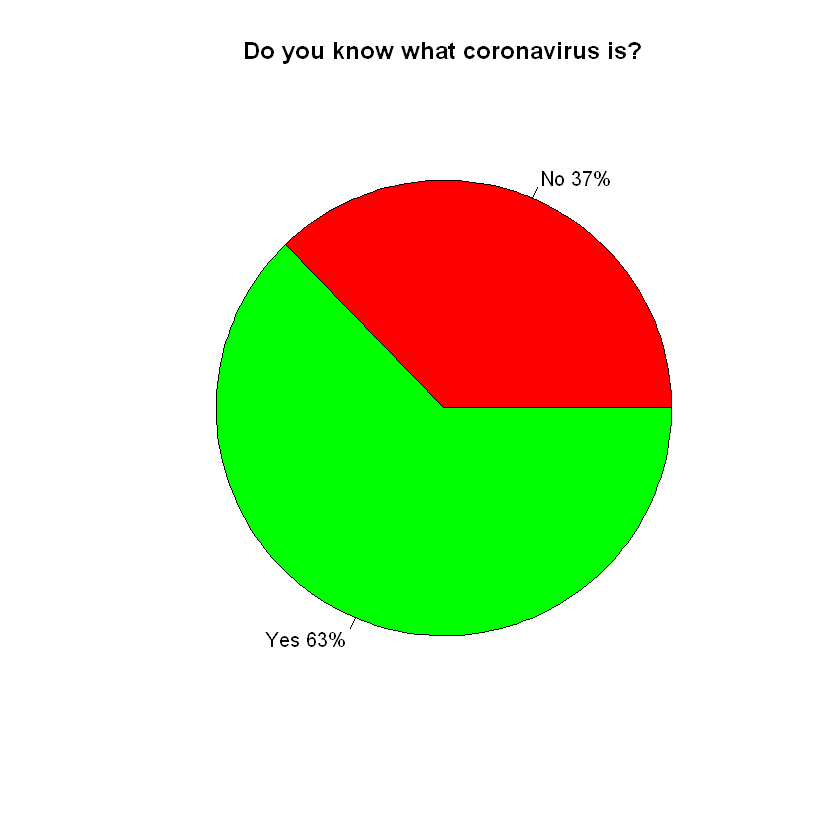

In [250]:
pie(Respondents_yes_no,labels = lbls_response, col=c("red", "green"), main="Do you know what coronavirus is?")

In [385]:
patterns = c("infectious", "droplets", "air", "not dangerous", "dangerous", "Other")

In [383]:
for (p in patterns){
    cat(paste(round(length(grep(p, Covid19_Qs[,2], value = TRUE))/length(Covid19_Qs[,2])*100),"%", sep=""), p, "\n")
}

56% infectious 
37% droplets 
24% air 
10% not dangerous 
17% dangerous 
4% Other 


#### What do respondents know about Covid19?

##### 1. What is it and how does it spread according to Respondents?

56% of respondents think that coronavirus is an infectious disease, 37% think that it spreads person to person through droplets. A significant number of respondents think that coronavirus is air born. 10% of respondents think that Covid19 is not dangerous for those who don't have any serious medical complications. However, 17% think that it is dangerous for elderly people who have other diseases.

#### 2. What do they think the Symptoms are?

In [384]:
symptoms = c("Cough", "Fever", "Difficult breathing", "Pressure in the chest", "Tiredness", "Soar Throat", "Other")
for (s in symptoms){
    cat(paste(round(length(grep(s, Covid19_Qs$What.are.the.symptoms.of.Coronavirus., value = TRUE)) / 
                    length(Covid19_Qs$What.are.the.symptoms.of.Coronavirus.)*100),"%", sep=""), s, "\n")
}

89% Cough 
88% Fever 
44% Difficult breathing 
29% Pressure in the chest 
39% Tiredness 
43% Soar Throat 
9% Other 


The symptoms according to the respondents are grouped as follows: 89% said that cough is one of the symptoms, 88% said it causes fever, 44% of respondents said it causes difficulty in breathing, 43% said that it causes soar throat, 39% said it causes tiredness, 29% said it causes pressure in the chest. So overall, respondents have a good knowledge about the symptoms of Covid19.

#### 3. How does Covid19 Spread?

In [386]:
spread <- c("spreads through droplets", "Close contact", "Touching face", "Touching mouth", "Touching nose", "Touching eyes",
            "Handshaking","Not social distancing", "Hugging", "Other")
for (s in spread){
    cat(paste(round(length(grep(s, Covid19_Qs$Do.you.know.how.Coronavirus.spreads., value = TRUE)) / 
                    length(Covid19_Qs$Do.you.know.how.Coronavirus.spreads.)*100),"%", sep=""), s, "\n")
}

48% spreads through droplets 
63% Close contact 
58% Touching face 
57% Touching mouth 
53% Touching nose 
43% Touching eyes 
52% Handshaking 
9% Not social distancing 
30% Hugging 
7% Other 


According to respondents this is how they Covid19 spreads: through close contact (63%), touching face with dirty hands (58%), touching mouse with dirty hands (57%), touching nose with dirty hands (53%), handshaking (52%), touching eyes with dirty hands (43%), hugging (30%), not social distancing (9%).

#### 4. Protection from Covid19

In [390]:
protection <- c("soap", "social distancing", "masks", "Prayer", "Quran", "Staying home", "medical care", 
                "don't have to protect ourselves")
for (p in protection){
    cat(paste(round(length(grep(p, Covid19_Qs$How.can.you.protect.yourself.from.coronavirus., value = TRUE)) / 
                    length(Covid19_Qs$How.can.you.protect.yourself.from.coronavirus.)*100),"%", sep=""), p, "\n")
}

74% soap 
44% social distancing 
50% masks 
62% Prayer 
47% Quran 
24% Staying home 
20% medical care 
3% don't have to protect ourselves 


Protection: 74% said through washing hands with soap and water, 62% through prayer and 47% through reciting the Quran, 50% said through wearing masks, 44% through social distancing, 24% said that they can protect themselves through staying home and isolating themselves, and 20% said that they could protect themselves through seeking medical care when they don't feel well. Only 3% said that they don't have to protect themselves.

#### 5. Measures to Take?

In [567]:
measure_Q <- Covid19_Qs[,44]
measures <- c("Stay at home", "Seek medical care", "Share the travel story to the doctor", "crowded place", 
              "Stay away from others", "clean")
for (m in measures){
    cat(paste(round(length(grep(m, measure_Q, value = TRUE)) / length(measure_Q)*100),"%", sep=""), m, "\n")
}

58% Stay at home 
72% Seek medical care 
40% Share the travel story to the doctor 
26% crowded place 
28% Stay away from others 
35% clean 


72% of respondents said to seek medical care in case they think that they or someone they know might have been exposed to Coronavirus. 58% said to stay at home, 40% said to share the travel story to doctor, 35% said to be clean, 28% to stay away from others, and 26% said to avoid crowded places.

#### 6. Treatment of Covid19 according to Respondents

In [405]:
no_treat <- c("No","Yes","no treatment")
for (n in no_treat){
    cat(paste(round(length(grep(n,Covid19_Qs$Do.you.know.what.the.treatment.for.Coronavirus.is.., value = TRUE)) / 
                    length(Covid19_Qs$Do.you.know.what.the.treatment.for.Coronavirus.is..)*100),"%", sep=""), n, "\n")
}

57% No 
32% Yes 
21% no treatment 


57% respondents said that they don't know what the treatment of Covid19 is and only 21% said there is no treatment for coronavirus. On the other hand 32% of respondents think that there is a treatment such as washing hands with soap and water.

##### 7. Information about Covid19

In [413]:
round(table(Covid19_Qs$Are.you.getting.any.information.about.the.Coronavirus.from.anywhere.) / 
sum(table(Covid19_Qs$Are.you.getting.any.information.about.the.Coronavirus.from.anywhere.)) * 100)


     No Yes 
  0  46  54 

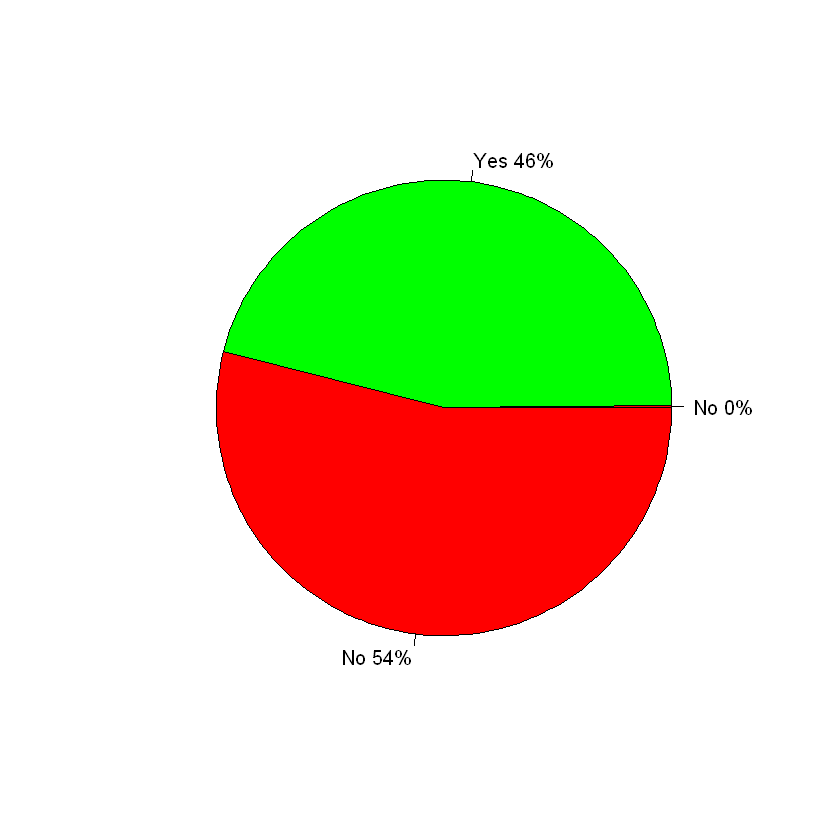

In [510]:
information <- table(Covid19_Qs$Are.you.getting.any.information.about.the.Coronavirus.from.anywhere.~Covid19_Qs$Gender)
pct_response <- round((information/sum(information))*100)
lbls_response <- c("No", "Yes")
lbls_response <- paste(lbls_response, pct_response) # add percents to labels
lbls_response <- paste(lbls_response,"%",sep="") # add % to labels
pie(information, labels = lbls_response, col=c("red", "green"))

Only 54% of respondents are receiving information about the coronavirus!

In [550]:
table(Covid19_Qs$Are.you.getting.any.information.about.the.Coronavirus.from.anywhere., Covid19_Qs$Gender)

     
      Female Male
           0    1
  No      93  159
  Yes     88  209

In [568]:
#aggregate(Covid19_Qs, by = list(Are.you.getting.any.information.about.the.Coronavirus.from.anywhere.,Gender), count)
myTable <- table(Covid19_Qs$Are.you.getting.any.information.about.the.Coronavirus.from.anywhere., Covid19_Qs$Gender)
#by_gender %>% summarise
#round(prop.table(myTable)*100)

###### How Do Respondonts receive information about Covid19?

In [566]:
info <- c("BBC 89.2 bangla", "revision news", "VOA", "90.0 bangla news", "cox's bazar radio", "RFE", "Dhaka radio",
         "89.6.100.8 MRTV", "Friends/family", "community leaders", "religious leaders", "army police", "facebook",
         "WhatsApp", "community events", "government official", "television", "internet", "mobile phone", "aid worker", 
         "megaphone", "newspaper", "leaflets", "posters", "magazines", "twitter", "Email", "CHWs", "Other")

for (i in info){
    cat(paste(round(length(grep(i,Covid19_Qs[,61], value = TRUE)) / length(Covid19_Qs[,61])*100),"%", sep=""), i, "\n")
}

11% BBC 89.2 bangla 
7% revision news 
4% VOA 
2% 90.0 bangla news 
4% cox's bazar radio 
4% RFE 
3% Dhaka radio 
2% 89.6.100.8 MRTV 
29% Friends/family 
26% community leaders 
30% religious leaders 
0% army police 
6% facebook 
5% WhatsApp 
4% community events 
4% government official 
3% television 
5% internet 
13% mobile phone 
14% aid worker 
25% megaphone 
2% newspaper 
11% leaflets 
10% posters 
0% magazines 
0% twitter 
0% Email 
5% CHWs 
1% Other 


No respondents received info about Covid19 from magazines, twitter, police and/or email. Respondents receive info about Covid19 from different resources ranging from religious leaders, community leaders, megaphone announcements, aid workers, mobile phones, leaflets, posters, radio stations, television, and social media (facebook and WhatsApp).

#### Languages of Information

In [569]:
languages <- c("Bangla", "Burmese", "Rohingya", "Chittagonian", "English")
for (l in languages){
    cat(paste(round(length(grep(l,Covid19_Qs[,91], value = TRUE)) / length(Covid19_Qs[,91])*100),"%", sep=""), l, "\n")
}

16% Bangla 
24% Burmese 
40% Rohingya 
12% Chittagonian 
8% English 


40% of respondents receive information about Covid19 in Rohingya, 24% in Burmese, 16% in Bangla, 12% in Chittagonian and 8% in English.

#### Do respondents understand the language they receive info about Covid19?

In [582]:
round(table(Covid19_Qs[,98]) / sum(table(Covid19_Qs[,98])) * 100)   # 46% did no respond this question. There are 253 missing values


     No Yes 
 46   6  48 

In [581]:
nrow(Covid19_Qs[Covid19_Qs[,98] == "Yes",])
nrow(Covid19_Qs[Covid19_Qs[,98] == "No",])
nrow(Covid19_Qs[Covid19_Qs[,98] == "",])

[1] 264

[1] 33

[1] 253

48% of respondents said that they understand the language they receive info about Covid19. However, 46% didn't respond to the question. 

##### 8. Materials Received

In [423]:
items <- c("Soap", "Hand sanitizer", "Face masks")
for (i in items){
    cat(paste(round(length(grep(i,Covid19_Qs[,98], value = TRUE)) / length(Covid19_Qs[,98])*100),"%", sep=""), i, "\n")
}

75% Soap 
13% Hand sanitizer 
18% Face masks 


75% of respondents said that they received soap in the last 4 weeks. However, only 13% and 18% of respondents received hand sanitizer and face masks, respectively.

##### Changes in Healthcare respondents receive

In [426]:
round(table(Covid19_Qs[,104])/sum(table(Covid19_Qs[,104]))*100)


I don't know           No          Yes 
          26           48           26 

48% of respondents said that healtcare services they typically received have not changed in the last 4 weeks. However, over quarter of respondents that these services have changed. On the other hand, 26% of respondents said that they don't know if these healthcares services that they typically received have changed or not. 

##### Changes in Basic Needs and Food?

In [463]:
changes <- round(table(Covid19_Qs[,106])/sum(table(Covid19_Qs[,106]))*100)

48% of respondents said that there has not been any changes to receiving food and other basic needs. A significant percentage (34%) said that there has been changes to receiving food and other basic needs in the last 4 weeks. Those who responded with yes said that they are receiving less rice, less food items, etc. In addition, they said that receiving food items from WFP is less, and prices of food items are higher. 

##### Needed Support?

In [561]:
Covid19_Qs_Female <- Covid19_Qs[Covid19_Qs[,1] == "Female",]
nrow(Covid19_Qs_Female)

[1] 181

In [563]:
support_Female <- c("More information", "PPE", "medical support", "Hygiene kits", "clean water", "Other")
for (s in support_Female){
    cat(paste(round(length(grep(s,Covid19_Qs_Female[,109], value = TRUE)) / length(Covid19_Qs_Female[,109])*100),"%", sep=""), s, "\n")
}

80% More information 
33% PPE 
23% medical support 
74% Hygiene kits 
36% clean water 
2% Other 


In [562]:
Covid19_Qs_Male <- Covid19_Qs[Covid19_Qs[,1] == "Male",]
nrow(Covid19_Qs_Male)

[1] 369

In [564]:
support_Male <- c("More information", "PPE", "medical support", "Hygiene kits", "clean water", "Other")
for (s in support_Male){
    cat(paste(round(length(grep(s,Covid19_Qs_Male[,109], value = TRUE)) / length(Covid19_Qs_Male[,109])*100),"%", sep=""), s, "\n")
}

76% More information 
43% PPE 
26% medical support 
67% Hygiene kits 
36% clean water 
6% Other 


In [466]:
support <- c("More information", "PPE", "medical support", "Hygiene kits", "clean water", "Other")
for (s in support){
    cat(paste(round(length(grep(s,Covid19_Qs[,109], value = TRUE)) / length(Covid19_Qs[,109])*100),"%", sep=""), s, "\n")
}

78% More information 
39% PPE 
25% medical support 
70% Hygiene kits 
36% clean water 
5% Other 


It was clear that respondents need more information about Covid19 and hygiene kits. 78% of respondents said that they need more information about Covid19 and 70% of respondents said that they hygiene kits. 39% need PPE materials and 36% need more clean water. About 25% of respondents said that they need medical support. Other things that they said they need are masks, mosquito bets, medicine, and better food.

## Children Survey Data about Coronavirus

In [508]:
children <- read.csv("ChildrenSurveyData20200418.csv",header = TRUE, stringsAsFactors = FALSE)

In [552]:
table(children$Gender)


Female   Male 
   104     82 

##### 1. What do Children know about Coronavirus

In [490]:
# table(children$What.do.you.know.about.the.Coronavirus.) / sum(table(children$What.do.you.know.about.the.Coronavirus.)) * 100

In [551]:
table(children$What.do.you.know.about.the.Coronavirus., children$Gender)

                                      
                                       Female Male
  I don't know anything about it           66   55
  Other                                    37   27
  Other I don't know anything about it      1    0

In [556]:
length(children$What.do.you.know.about.the.Coronavirus.)/nrow(children)

[1] 1

65% of children who responded to the question said that they don't know anything about Covid19. The rest said that they know that they have to stay home, that they need to isolate themselves, to wash their hands, that it is a disease, that it is dangerous, that they shouldn't shake hands, that they shouldn't touch their eyes, mouth and nose, that they need to stay clean, that it is an infectious disease and that it started in China.

##### 2. Where have children heard about it?

In [493]:
received_info <- c("Mahji", "friends/family", "religious leaders", "community leaders", "police", "radio", "Facebook",
                  "Community events", "government", "television", "aid worker", "internet", "mobile phone", "megaphone",
                  "newspapers", "leaflets", "magazines", "posters", "twitter", "email")
for (i in received_info){
    cat(paste(round(length(grep(i,children$Where.do.you.get.your.information.about.Coronavirus., value = TRUE)) / 
                    length(children$Where.do.you.get.your.information.about.Coronavirus.)*100),"%", sep=""), i, "\n")
}

16% Mahji 
13% friends/family 
23% religious leaders 
18% community leaders 
1% police 
2% radio 
2% Facebook 
6% Community events 
0% government 
1% television 
11% aid worker 
1% internet 
1% mobile phone 
27% megaphone 
0% newspapers 
3% leaflets 
0% magazines 
3% posters 
0% twitter 
0% email 


Children received information about Covid19 from megaphone announcements (27%), religious leaders (23%), community leaders (18%), Mahji (16%), family and friends (13%), aid workers (11%) and others (community events, Facebook, leaflets and posters, etc.)

##### 3. How do Children Protect themselves?

In [495]:
child_protection <- c("Wash hands", "Do not touch others outside my family", "Keep distance when outside the house", 
                     "Wear gloves")
for (p in child_protection){
    cat(paste(round(length(grep(p,children$What.ways.do.you.protect.yourself.from.Coronavirus., value = TRUE)) / 
                    length(children$What.ways.do.you.protect.yourself.from.Coronavirus.)*100),"%", sep=""),p, "\n")
}

91% Wash hands 
50% Do not touch others outside my family 
40% Keep distance when outside the house 
19% Wear gloves 


Almost all children (91%) said that they wash their hands to protect themselves against Covid19

##### 4. Children's Worries

In [501]:
worries <- c("Kidnapping", "Violence within community", "Armed group recruitment", "Sexual violence", "Diseases", "Drug use",
            "Child marriage", "I don't know", "I don't have any worries or concerns", "I may die if COVID19 catch me")
for (w in worries){
    cat(paste(round(length(grep(w,children$What.are.your.biggest.worries.and.concerns.at.this.time., value = TRUE)) / 
                    length(children$What.are.your.biggest.worries.and.concerns.at.this.time.)*100),"%", sep=""),w, "\n")
}

30% Kidnapping 
17% Violence within community 
3% Armed group recruitment 
5% Sexual violence 
58% Diseases 
6% Drug use 
0% Child marriage 
25% I don't know 
15% I don't have any worries or concerns 
20% I may die if COVID19 catch me 


58% of children are worried about diseases, 30% about kidnapping, 20% expressed worries about dying if they get infected by Covid19, 17% about violence within community, 6% about drug use, 5% about sexual violence, and 3% about armed group recruitment. Only 15% of children said that they don't have any worries or concerns.

In [505]:
# table(children$Have.you.watched.video.or.listened.to.audio.about.COVID.19.) / sum(table(children$Have.you.watched.video.or.listened.to.audio.about.COVID.19.))*100

60% of children said that they have not watched video or listened to audio about Covid19. Only 40% have watched!